<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2016/17</h2>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<h3>Fitting power law distributions</h3>
<hr>
</center>

In [1]:
import networkx as nx
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We use the Python toolbox [powerlaw](https://github.com/jeffalstott/powerlaw) that implements a method proposed by Aaron Clauset and collaborators in [this paper](https://arxiv.org/abs/0706.1062).

The paper explains why fitting a power law distribution using a linear regression of logarthim is not correct. 
A more sound approach is based on a Maximum Likelihood Estimator.

The package can be installed using `pip` as `pip install powerlaw`.

Full documentation is available [here](http://pythonhosted.org/powerlaw/).

Several examples and a detailed description of the library has been published in [PLOS ONE
](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777).

In [4]:
import powerlaw as pwl

# Analysis of ca-AstroPh

We analyze the network file 'ca-AstroPh' from the SNAP repository

In [5]:
G=nx.Graph()

fh=open('./ca-AstroPh.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    if s[0]!='#':
        origin=int(s[0])
        dest=int(s[1])
        G.add_edge(origin,dest)
fh.close()

In [8]:
len(G), len(G.edges())

(18772, 198110)

In [6]:
degree = np.array(G.degree().values())

Let's plot the degree distribution

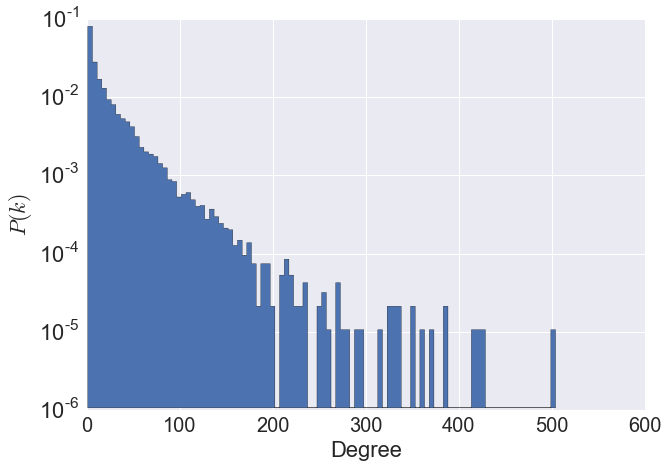

In [16]:
plt.figure(figsize=(10,7))
plt.hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

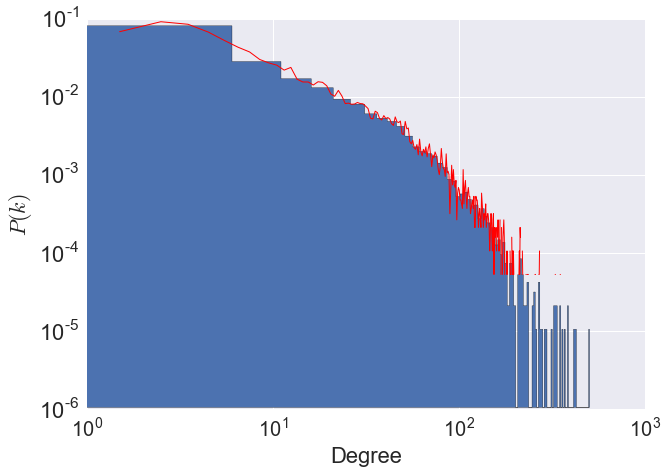

In [11]:
plt.figure(figsize=(10,7))
plt.hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

pwl.plot_pdf(degree, color='r', linear_bins=True, linewidth=1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

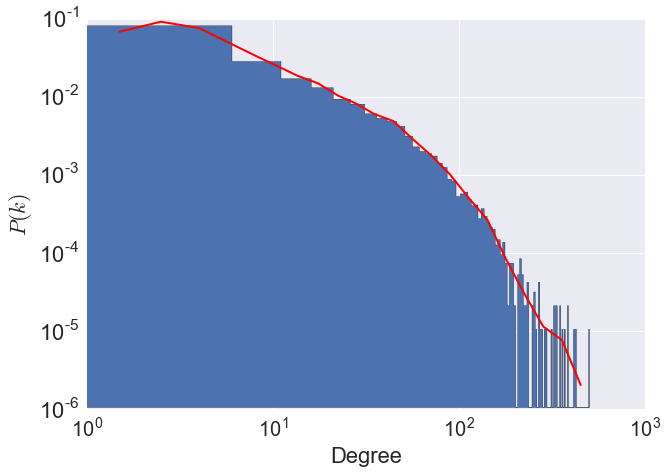

In [12]:
plt.figure(figsize=(10,7))
plt.hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

pwl.plot_pdf(degree, color='r', linear_bins=False, linewidth=2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

## Parameter estimation

The library powerlaw allows to estimate the exponent $\alpha$ and the minimum value for the scaling $x_{min}$

In [17]:
fit_function = pwl.Fit(degree)

Calculating best minimal value for power law fit


In [18]:
fit_function

In [19]:
fit_function.power_law

In [20]:
fit_function.power_law.alpha

4.5435770465065541

In [21]:
fit_function.power_law.sigma

0.19934178305118491

In [22]:
fit_function.power_law.xmin

123.0

We fix the minimum value for the scaling $x_{min}=10$

In [23]:
fit_function_fixmin = pwl.Fit(degree, xmin=10)

In [24]:
fit_function_fixmin.xmin

10.0

In [25]:
fit_function_fixmin.power_law.alpha

1.9475409247436344

In [26]:
fit_function_fixmin.power_law.sigma

0.0098086810185915047

We look at the values of the Kolgomorov-Sminorv distance of the two fits to compare them.

In [27]:
fit_function.power_law.D

0.028347190083988588

In [28]:
fit_function_fixmin.power_law.D

0.12754011660628156

## Visualize distributions and fit

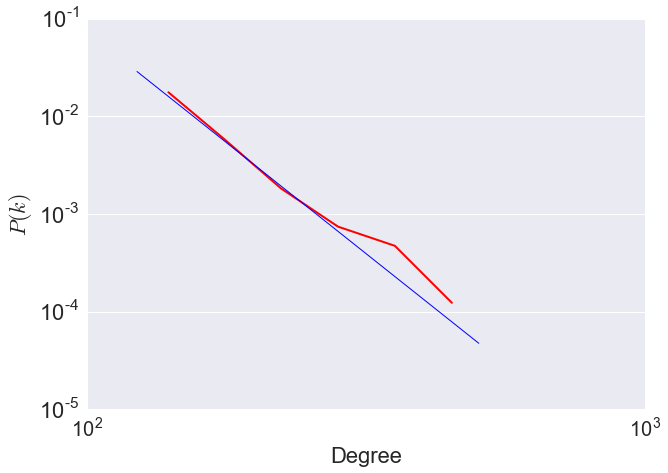

In [30]:
fig=plt.figure(figsize=(10,7))

#fig=pwl.plot_pdf(degree, color='r', linewidth=2)

fig=pwl.plot_pdf([x for x in degree if x>123], color='r', linewidth=2)

fit_function.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

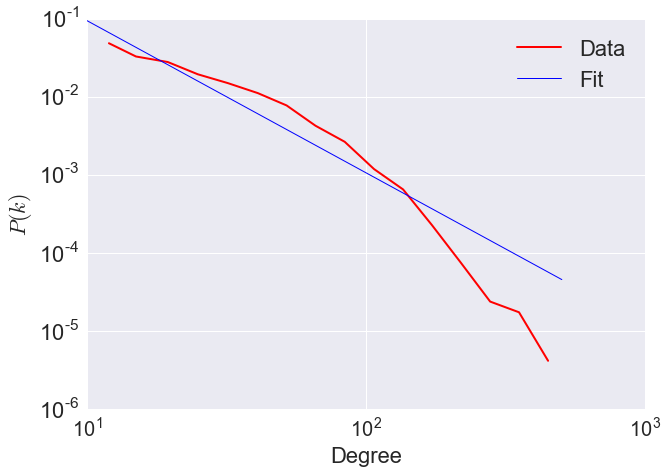

In [31]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

## Comparing Candidate Distributions

We can compare the goodness of fit of several distributions.

In [32]:
fit_function.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

In [33]:
R,p = fit_function.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [34]:
R,p

(2.4450468427863137, 0.014483332945893693)

R is the loglikelihood ratio between the two candidate distributions. This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. The significance value for that direction is p. 

In [35]:
R2,p2 = fit_function.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)

In [36]:
R2,p2

(0.26521294560765446, 0.79084542273448333)

In [37]:
R3,p3 = fit_function.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions


In [38]:
R3,p3

(-0.46891429705144816, 0.57815266277506916)

In [39]:
R4,p4 = fit_function.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True)

In [40]:
R4,p4

(0.43974656259334999, 0.66012067460496426)

Analyze the power law with $x_{min}=10$.

Here, the truncated power law is the best fit that explains the data. Even an exponential is a better fit to the data.

In [41]:
R,p = fit_function_fixmin.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [42]:
R,p

(-9.8342214467373896, 8.018539959420145e-23)

In [43]:
R3, p3 = fit_function_fixmin.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R3, p3

Assuming nested distributions


(-28.906628686152743, 0.0)

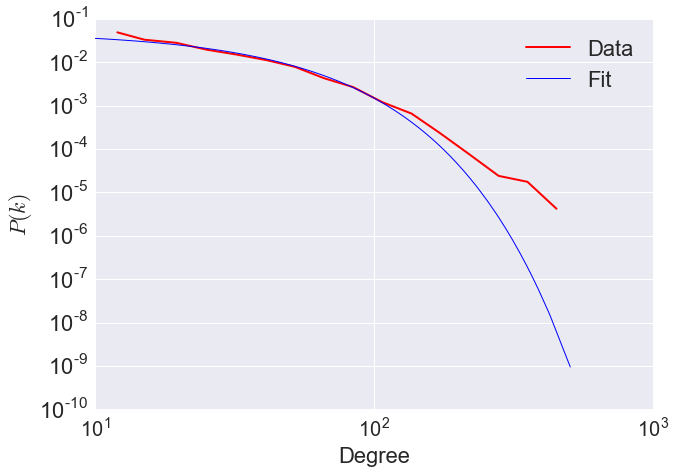

In [44]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.exponential.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

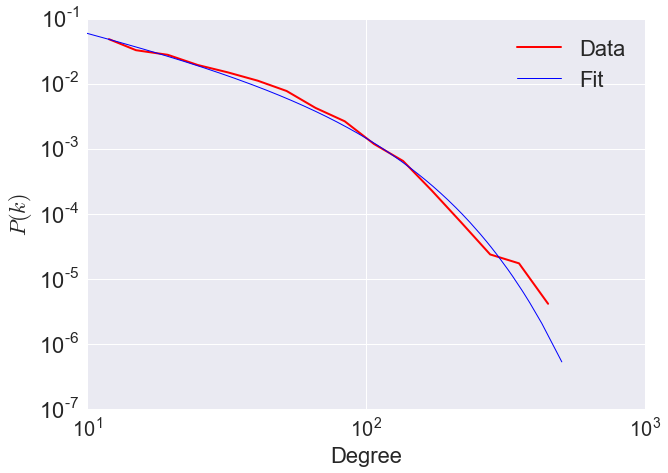

In [45]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.truncated_power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [46]:
fit_function_fixmin.truncated_power_law.parameter1

1.0000004640031106

In [47]:
fit_function_fixmin.truncated_power_law.parameter2

0.015591711849720618